In [8]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [9]:
exp_type = 'simulation'
exp = 'pv'
exp_name = '2024_03_06-11_51_46'

**Prepare structures and functions to plot everything we need**

In [10]:
folder_exp_dict = {'pv': 'PV_profile', '20C': '20C_check_up'}

In [11]:
folder = "../data/output/" + exp_type + '/'
folder_path = Path(folder)

ground_file = folder_path / folder_exp_dict[exp] / exp_name / 'ground.csv'
output_file = folder_path / folder_exp_dict[exp] / exp_name / 'dataset.csv'

In [12]:
def plot_separated_vars(df, 
                        variables: list, 
                        x_var: str, 
                        x_label: list, 
                        y_labels : list, 
                        legend_labels: list, 
                        markers: list,
                        title: str, 
                        colors=None, 
                        save_figs=False, 
                        fig_name=''
                       ):
    if not colors:
        colors = ['cyan', 'violet', 'purple', 'magenta']
    
    fig, axes = plt.subplots(len(variables), 1, figsize=(15,3.5 * len(variables)), sharex=True)
    
    # Plot iteratively all the variables
    for i, var in enumerate(variables):
        
        # We need this assignement in the case of a single variable
        if len(variables) == 1:
            ax = axes
        else:
            ax = axes[i]
        
        # Command for the grid
        ax.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
        
        ax.plot(df[x_var], df[var], label=legend_labels[i], color=colors[i], marker=markers[i], markevery=5000)
        
        ax.ticklabel_format(style='plain')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])
        
        ax.legend()
        
        if save_figs:
            fig.savefig(fig_name, format='svg')
    
    fig.suptitle(title, fontsize=24, y=0.92)
        
    plt.show()

### PLOT SEPARATED DATA

In [13]:
df_ground = pd.read_csv(ground_file)
df_ground

,current,voltage,temperature,power,time
0,-0.2322,3.5641,295.9180,-0.827453,0.0
1,-0.2322,3.5641,295.9180,-0.827453,0.1
2,-0.2322,3.5641,295.9180,-0.827453,0.2
3,-0.2322,3.5641,295.9180,-0.827453,0.3
4,-0.2322,3.5641,295.9180,-0.827453,0.4
...,...,...,...,...,...
777596,-0.2322,3.7305,295.1321,-0.866088,86399.5
777597,-0.2322,3.7305,295.1321,-0.866088,86399.6
777598,-0.2322,3.7305,295.1321,-0.866088,86399.7
777599,-0.2322,3.7305,295.1321,-0.866088,86399.8


In [14]:
df = pd.read_csv(output_file)
df

,time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
0,-1.0,0.200000,1.0,3.560000,0.000000,0.000000,0.000000,0.002887,0.003891,32246.302169,295.880000,0.000000
1,0.0,0.200000,1.0,3.591619,-0.232431,-0.827453,3.590947,0.002887,0.003891,32246.302169,295.879726,0.000156
2,0.1,0.199999,1.0,3.591614,-0.230384,-0.827453,3.590947,0.002887,0.003891,32246.212874,295.879452,0.000153
3,0.2,0.199999,1.0,3.591615,-0.230385,-0.827453,3.590947,0.002887,0.003891,32246.123973,295.879179,0.000153
4,0.3,0.199999,1.0,3.591615,-0.230385,-0.827453,3.590947,0.002887,0.003891,32246.035090,295.878905,0.000153
...,...,...,...,...,...,...,...,...,...,...,...,...
777597,86399.5,0.578848,1.0,3.744337,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.228530,295.143339,0.000354
777598,86399.6,0.578847,1.0,3.744337,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.228314,295.143340,0.000354
777599,86399.7,0.578847,1.0,3.744336,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.228098,295.143341,0.000354
777600,86399.8,0.578847,1.0,3.744336,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.227882,295.143341,0.000354


In [15]:
args_20c = {
    'df': df, 
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],    
    'title': '20°C profile',
    'colors': ['purple'],
    'save_figs': False,
    'fig_name': '20C_load.svg'
}

In [16]:
args_pv = {
    'df': df,
    'variables': ['current', 'voltage', 'soc'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]', '[V]', '%'],
    'legend_labels': ['Current', 'Voltage', 'SOC'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],
    'title': 'PV profile',
    'colors': ['purple', 'violet', 'blue'],
    'save_figs': False,
    'fig_name': 'pv_load.svg'
}

In [17]:
args_pv_ground = {
    'df': df_ground,
    'variables': [ 'voltage'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[V]'],
    'legend_labels': [ 'Voltage',],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],
    'title': 'PV profile',
    'colors': ['purple', 'violet', 'blue'],
    'save_figs': False,
    'fig_name': 'pv_load.svg'
}

In [18]:
args = {'pv': args_pv, '20C': args_20c}

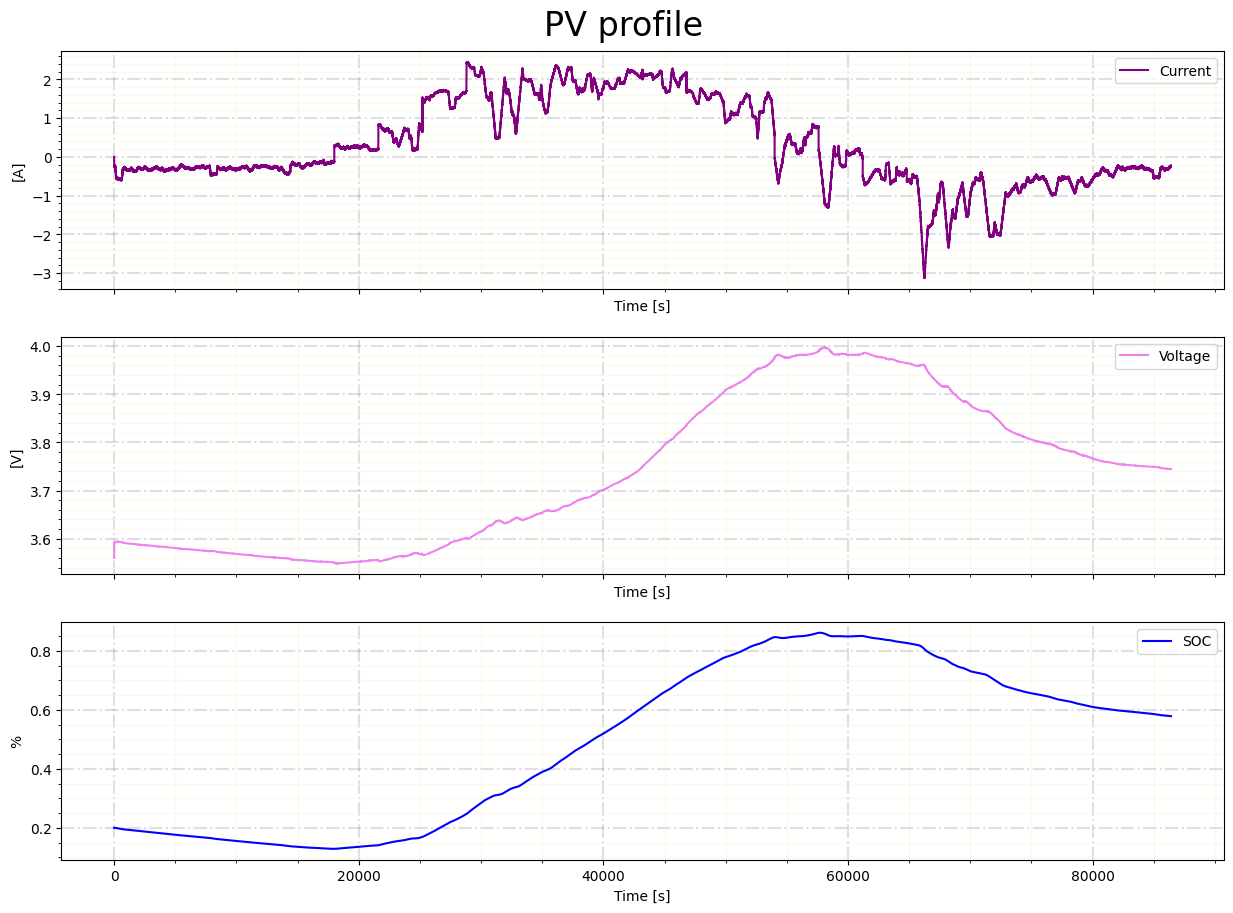

In [19]:
plot_separated_vars(**args[exp])

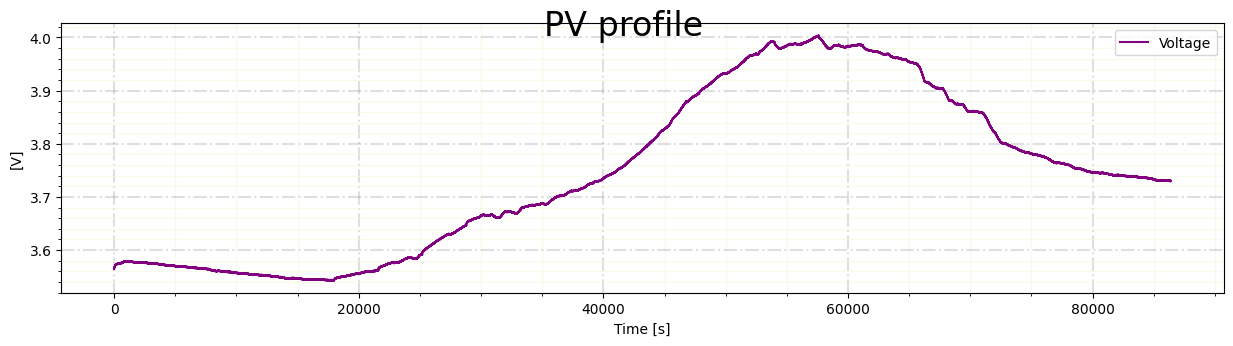

In [20]:
plot_separated_vars(**args_pv_ground)